# Apply clustering on the data with hierarchial clustering or k-means, using random features and random number of clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [6]:
df = pd.read_csv("lesson3-data.csv")

print("=====display(df)==================================================")
display(df)
print(type(df))

print("=====df.info() ===================================================")
df.info()                        

print("=====display(df.head()) ==========================================")
display(df.head())               

print("======df.describe()===============================================")
display(df.describe()) 

df.isnull().any().any()
# Check there is any null value

# Replace the gender using numbers for better plotting
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

=====display(df)==================================================


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<class 'pandas.core.frame.DataFrame'>
=====df.info() ===================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
=====display(df.head()) ==========================================


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


======df.describe()===============================================


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Explore the relevance of the features pairwise

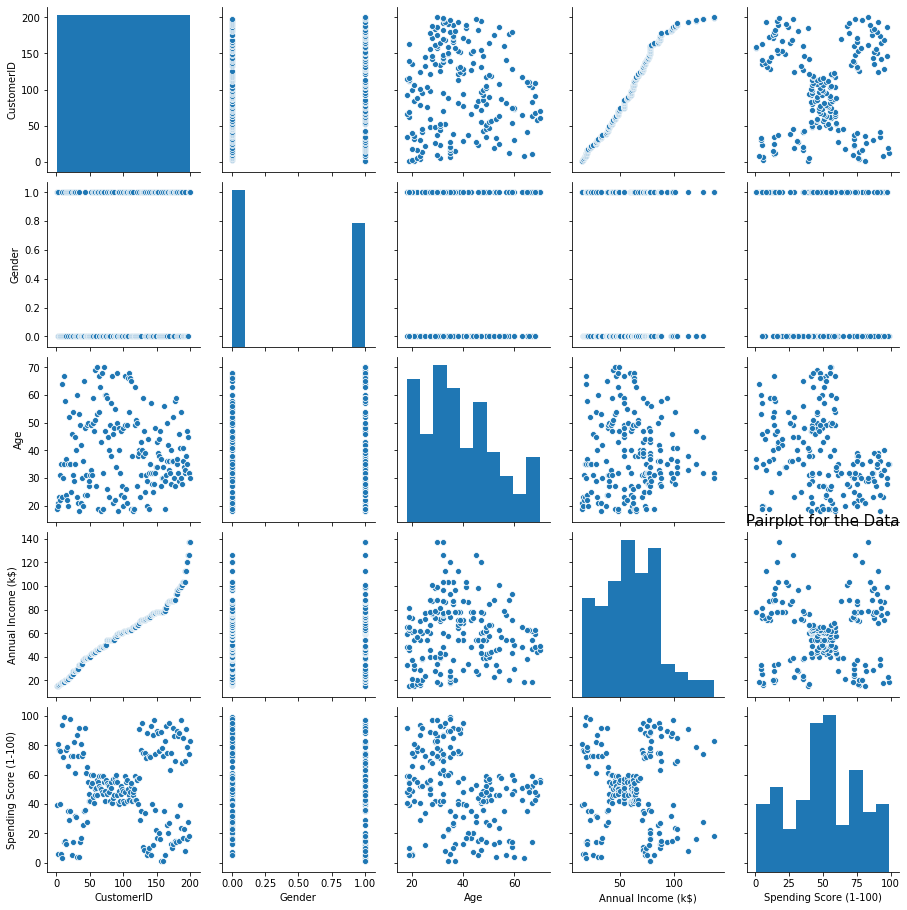

In [7]:
import seaborn as sns

sns.pairplot(df)
plt.title("Pairplot for the Data", fontsize = 15)
plt.show()

Text(0.5, 1, 'Correlation Factors Heat Map')

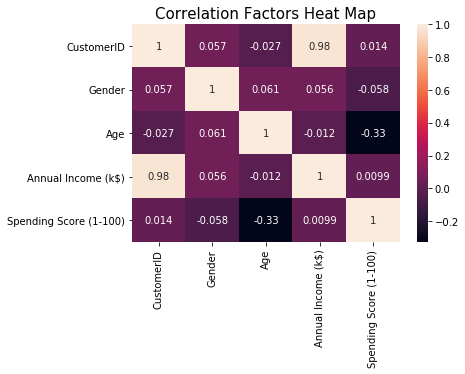

In [13]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')

## Explore the relevance of Annual Income & Spending Score

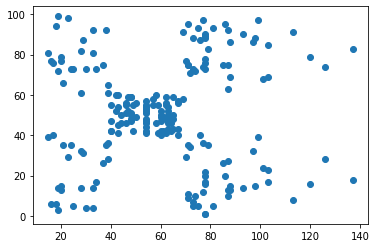

In [21]:
data1 = df.iloc[:,3:5] # Use only Annual Income & Spending Score

plt.scatter(data1["Annual Income (k$)"],data1["Spending Score (1-100)"]) #Plot scatter of the data

## Apply hierarchical clustering

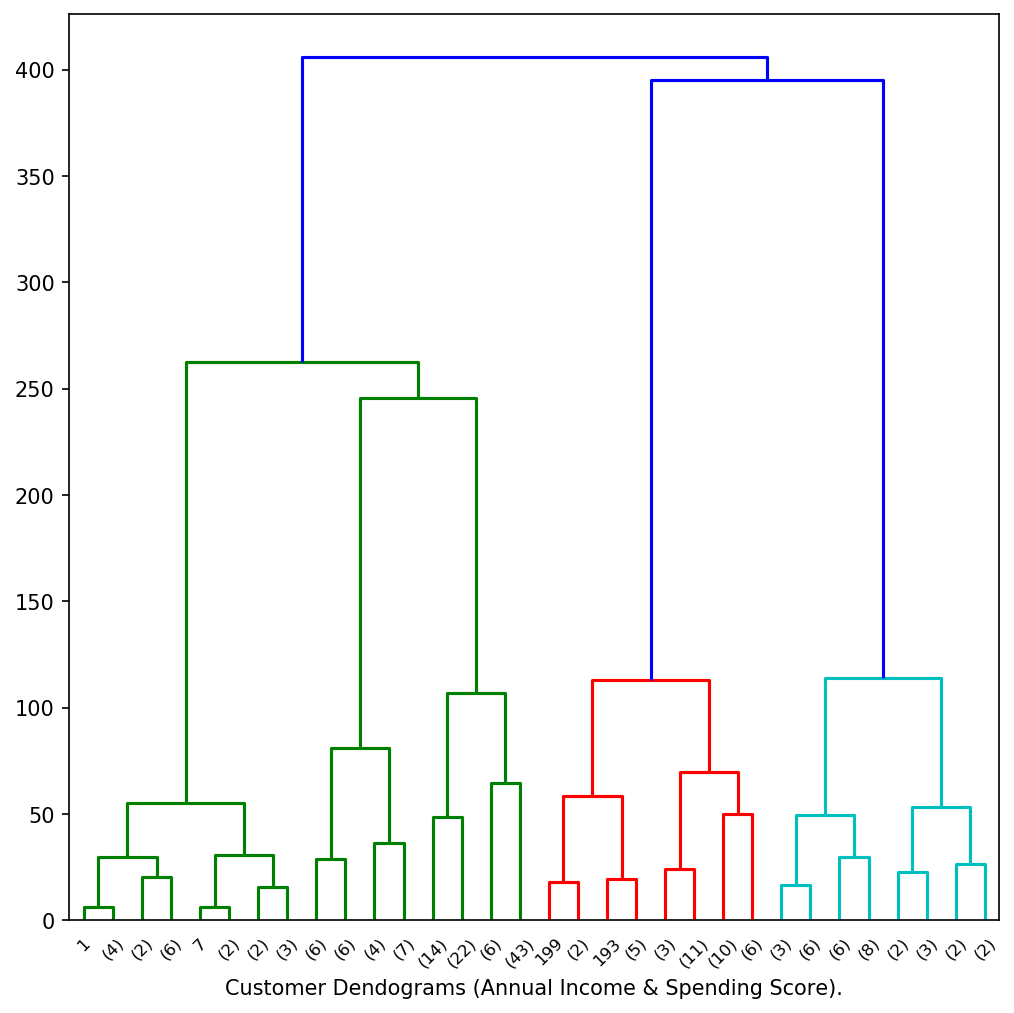

In [53]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)
    
    return linkage_matrix

model1 = AgglomerativeClustering(affinity='euclidean', linkage='ward',distance_threshold=0, n_clusters=None)

model1 = model1.fit(data1)
fig = plt.figure(figsize=(8,8),dpi=150)
linkage_matrix = plot_dendrogram(model1, truncate_mode='level', p=4)
plt.xlabel("Customer Dendograms (Annual Income & Spending Score).")
plt.show()

### Check the silhouette score using different number of clusters

2 0.36706444723912895
3 0.4618340266628975
4 0.4916598193892782
5 0.5529945955148897
6 0.5380208285578872
7 0.519904611908887
8 0.4326286245782246
9 0.43892545672004507
10 0.4342656377895271
11 0.4235291810694601
12 0.4292221461834499
13 0.4115159018886883
14 0.4116644433478917
15 0.41938401859787305
16 0.4191386867941397
17 0.4123238100861266
18 0.422988685948502
19 0.42079092019236053
20 0.4221992230734392


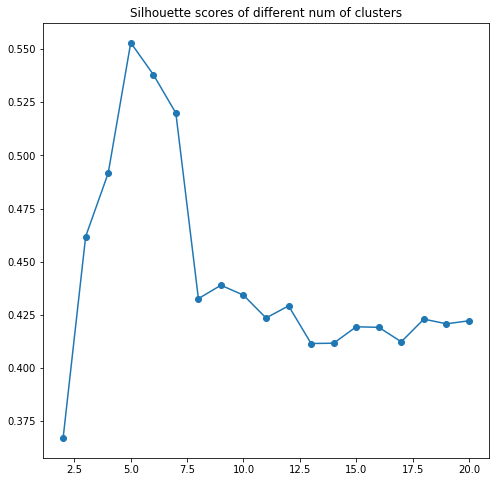

In [59]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

clusterNumList1 = []
scoreList1 = []

for i in range(2,21):
    clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
    score = silhouette_score(data1, clusters, metric='euclidean')
    print(i,score)
    clusterNumList1.append(i)
    scoreList1.append(score)
    
fig = plt.figure(figsize=(8,8))
plt.title("Silhouette scores of different num of clusters")
plt.plot(clusterNumList1,scoreList1,marker="o")

### As it is shown in the silhouette score figure, the performance of clustering is best when the number of clusters is 5.

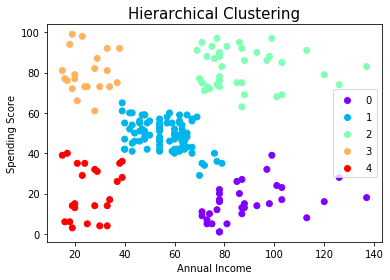

In [68]:
model_1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster1 = model_1.fit_predict(data1)

scatterPlot = plt.scatter(data1.values[:,0], data1.values[:,1], c=model_1.labels_, cmap = 'rainbow')


plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(*scatterPlot.legend_elements())
plt.show()

## Show the characteristics of the cluster by summarizing the data contained in each cluster, and explain in words what kind of cluster it is.

Bottom right (0) : the customers with high salaries but low spending.
    
Middle (1): average income and average salaries(highest number and clustered).

Top right (2): the customers with high salaries and high spending.

Top left (3): the customers with low salaries but high spending.

Bottom left (4): the customers with low salaries and low spending.    

## Apply K-Means 

### Check  squared distance (SSE) between data points and their assigned clusters’ centroids using Elbow Method

1 269981.28
2 181363.59595959596
3 106348.37306211118
4 73679.78903948834
5 44448.45544793371
6 37239.83554245604
7 30241.34361793659
8 24986.52564064288
9 21797.08494464637
10 19641.456216651564
11 17886.030094013244
12 16041.057716157717
13 14632.017997073606
14 12744.657467532466
15 11809.265314570488
16 11019.378018533193
17 10265.255711673384
18 9348.572266863572
19 8814.069973323778
20 8232.627019471756


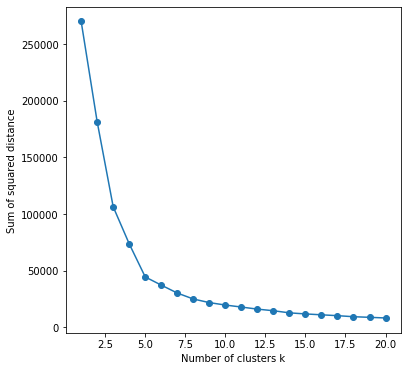

In [22]:
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 21))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data1)
    sse.append(km.inertia_)
    print(k,km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance');

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

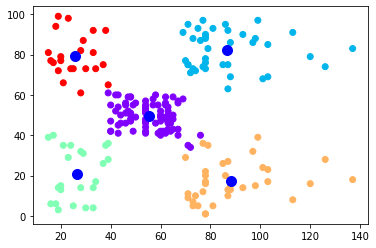

In [48]:
clusterNum = 5 
# k is picked at the spot where SSE starts to flatten out and form an elbow.
model2 = KMeans(n_clusters=clusterNum, init='k-means++')
cluster2 = model2.fit_predict(data1)

plt.scatter(data1.values[:,0], data1.values[:,1], c=model2.labels_, cmap = 'rainbow')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s = 100, c = 'blue')
model2.cluster_centers_

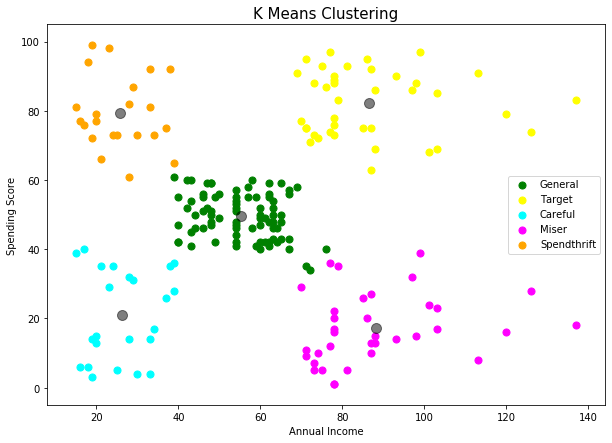

In [50]:
centers = model2.cluster_centers_

plt.figure(figsize=(10, 7))
plt.scatter(data1.values[cluster2 == 0, 0], data1.values[cluster2 == 0, 1], s=50, c='green', label = 'General')
plt.scatter(data1.values[cluster2 == 1, 0], data1.values[cluster2 == 1, 1], s=50, c='yellow', label = 'Target')
plt.scatter(data1.values[cluster2 == 2, 0], data1.values[cluster2 == 2, 1], s=50, c='cyan', label = 'Careful')
plt.scatter(data1.values[cluster2 == 3, 0], data1.values[cluster2 == 3, 1], s=50, c='magenta', label = 'Miser')
plt.scatter(data1.values[cluster2 == 4, 0], data1.values[cluster2 == 4, 1], s=50, c='orange', label = 'Spendthrift')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

# Exlopre relevance of Age & Spending Score

In [18]:
data2 = df.iloc[:,[2,4]]

sse2 = []
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data3)
    sse2.append(km.inertia_)
    print(k,km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse2, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance');

NameError: name 'KMeans' is not defined

array([[55.70833333, 48.22916667],
       [27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333]])

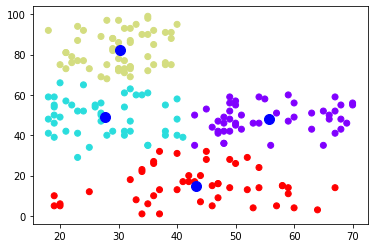

In [46]:
# The cluster number 4 is picked at the elbow
model3 = KMeans(n_clusters=4, init='k-means++')
cluster3 = model3.fit_predict(data3)

plt.scatter(data3.values[:,0], data3.values[:,1], c=model3.labels_, cmap = 'rainbow')
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], s = 100, c = 'blue')
model3.cluster_centers_

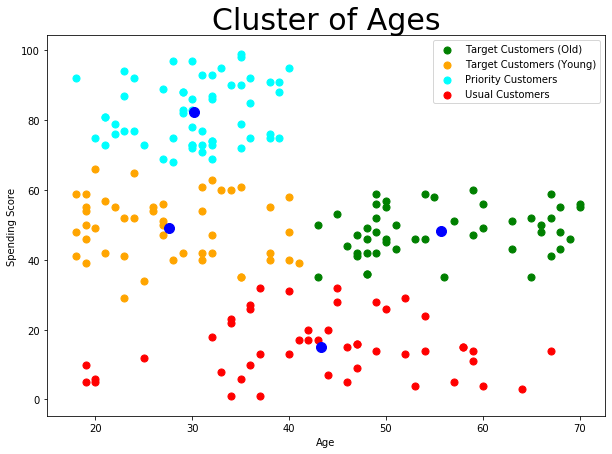

In [47]:
plt.figure(figsize = (10,7))
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(data3.values[cluster3 == 0, 0], data3.values[cluster3 == 0, 1], s = 50, c = 'green', label = 'Target Customers (Old)')
plt.scatter(data3.values[cluster3 == 1, 0], data3.values[cluster3 == 1, 1], s = 50, c = 'orange', label = 'Target Customers (Young)')
plt.scatter(data3.values[cluster3 == 2, 0], data3.values[cluster3 == 2, 1], s = 50, c = 'cyan', label = 'Priority Customers')
plt.scatter(data3.values[cluster3 == 3, 0], data3.values[cluster3 == 3, 1], s = 50, c = 'red',label = 'Usual Customers')

plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], s = 100, c = 'blue')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Considering the Gender of customers

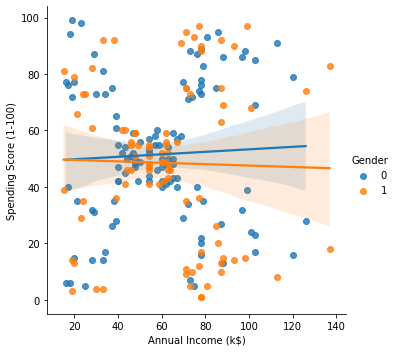

In [16]:
#seaborn.lmplot() plot the data and regression model fit across Facetgrid
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Gender")

0 represents female and 1 represents male. This plot indicates that female tend to have higher spending score on no matter what level of annual income than male. 

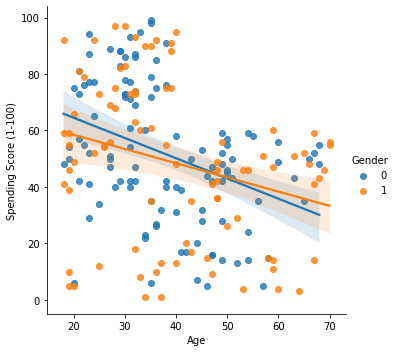

In [17]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = "Gender")

This plot shows that young people tend to spend much more than old people, especially young female. Yound female should be the most target customers for the mall. 